Artifial Intelligence : The Beginning 

The intelligence is ntg but calculating the possiblities and working all cases and finding out the best / optimal case for solving real world problem

Uninformed Search: u donot have knowledge about the problem exactly 
BFS & DFS are the algo will learn in this course 

Search Problem:i)Initial State ii)Actions/Successor options iii)State Space iv)Goal Test v)Search Algo 

Search:  
i)Uninformed Search: a)BFS b)DFS c)IDS d)Cost Sensitive Search in these we donot know the info abt goal we just know the goal that all  
ii)Informed: Heuristic Function we use a function to approx some or the other info abt the goal a)Manhattan is the example 

Work-Flow-Maze-Problem:  
Input:maze  
Output:A solved maze with star * as path  
1)process maze and find start and goal  
2)Create a function that give option for actions  
3)solution class which uses the processing -> actions -> checking goal -> repeat  

In [8]:
# every position in the path must have 2 prop next_step,current state/coordinate
class Node:
    def __init__(self,state,nextStep):
        self.state = state 
        self.nextStep = nextStep

In [6]:
# maze processing, start and goal finding 
def processMaze(filePath):
    with open(filePath) as f:
        contents = f.read().split("\n")
        maze = []
        goal = 0
        start = 0
        for i,line in enumerate(contents):
            row = []
            for j,char in enumerate(line):
                if(char == 'A'):
                    start = (i,j)
                    row.append('A')
                elif(char == "B"):
                    goal = (i,j)
                    row.append('B')
                elif(char == " "):
                    row.append(0)
                else:
                    row.append(1)
            maze.append(row)
    return maze,start,goal
processMaze('maze.txt')


([[1, 1, 1, 1, 1, 1, 1],
  [1, 'A', 0, 1, 0, 0, 1],
  [1, 0, 0, 1, 1, 0, 1],
  [1, 0, 0, 0, 0, 0, 1],
  [1, 1, 0, 1, 1, 'B', 1],
  [1, 1, 1, 1, 1, 1, 1]],
 (1, 1),
 (4, 5))

In [ ]:
# frontier classes 
class Frontier:
    def __init__(self):
        self.frontier = []
    def add(self,node):
        self.frontier.append(node)
    def isEmpty(self):
        return True if(len(self.frontier) == 0) else False
class QueueFrontier(Frontier):
    def remove(self):
        if(self.isEmpty()):
            raise Exception("Empty Frontier")
        return self.frontier.pop()
class StackFrontier(Frontier):
    def remove(self):
        if(self.isEmpty()):
            raise Exception("Empty Frontier")
        data = self.frontier[0]
        self.frontier = self.frontier[1:]
        return data 

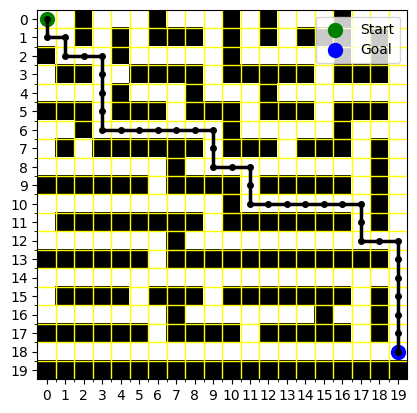

['*', 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]

['*', '*', 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0]

[1, '*', '*', '*', 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]

[0, 1, 1, '*', 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0]

[0, 0, 0, '*', 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

[1, 1, 1, '*', 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0]

[0, 0, 1, '*', '*', '*', '*', '*', '*', '*', 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]

[0, 1, 0, 1, 1, 1, 1, 1, 1, '*', 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]

[0, 0, 0, 0, 0, 0, 0, 1, 0, '*', '*', '*', 0, 0, 0, 0, 0, 0, 1, 0]

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, '*', 1, 1, 1, 1, 1, 0, 1, 0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, '*', '*', '*', '*', '*', '*', '*', 1, 0]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, '*', 1, 0]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, '*', '*', '*']

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, '*']

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '*']

[0

In [ ]:
import matplotlib.pyplot as plt,random,numpy as np
class Node:
    def __init__(self,state,parent = None,action = None):
        self.state = state# coordinates
        self.parent = parent#parent
        self.action = action#up down left right
# frontier classes 
class Frontier:
    def __init__(self):
        self.frontier = []
    def add(self,node):
        self.frontier.append(node)
    def isEmpty(self):
        return True if(len(self.frontier) == 0) else False
class StackFrontier(Frontier):
    def remove(self):
        if(self.isEmpty()):
            raise Exception("Empty Frontier")
        return self.frontier.pop()
class QueueFrontier(Frontier):
    def remove(self):
        if(self.isEmpty()):
            raise Exception("Empty Frontier")
        data = self.frontier[0]
        self.frontier = self.frontier[1:]
        return data 
def processMaze(filePath):
        with open(filePath) as f:
            contents = f.read().split("\n")
            maze = []
            goal = 0
            start = 0
            for i,line in enumerate(contents):
                row = []
                for j,char in enumerate(line):
                    if(char == 'A'):
                        start = (i,j)
                        row.append(0)
                    elif(char == "B"):
                        goal = (i,j)
                        row.append(0)
                    elif(char == ' '):
                        row.append(0)
                    else:
                        row.append(1)
                maze.append(row)
        return maze,start,goal
class Solution:
    def __init__(self,filePath):
        self.maze,self.start,self.goal = processMaze(filePath)

    def actions(self, node):
        x1, y1 = node.state
        moves = [("up", (x1 - 1, y1)),("down", (x1 + 1, y1)),("right", (x1, y1 + 1)),("left", (x1, y1 - 1))]
        res = []
        for direction, (x, y) in moves:
            if 0 <= x < len(self.maze) and 0 <= y < len(self.maze[0]):
                if self.maze[x][y] == 0:
                    res.append((direction, (x, y)))
        return res
    
    def constructPath(self,node):
        path = []
        actions = []
        while(node.state != self.start):
            path.append(node.state)
            actions.append(node.action)
            node = node.parent
        path.append(self.start)
        return path[::-1],actions[::-1]
    
    def pathShow(self,coorList):
        maze = self.maze
        for x , y in coorList:
            maze[x][y] = '*'
        for row in maze:
            print(row)
            print()
        return 

    def prepare_maze_for_plot(self,maze):
        mapping = {" ": 0, 0: 0, 1: 1, "*": 0, "A": 0, "B": 0}
        numeric_maze = [[mapping.get(cell, 1) for cell in row] for row in maze]
        return np.array(numeric_maze, dtype=int)

    def draw_maze_with_path(self,maze, path, start, goal, all_paths):
        fig, ax = plt.subplots()
        numeric_maze = self.prepare_maze_for_plot(maze)  
        ax.imshow(maze, cmap="gray_r")
        for visit_path in all_paths:
            color = random.choice(
                ["red", "blue", "orange", "green", "purple", "pink", "cyan", "brown"]
            )
            x_coords = [p[1] for p in visit_path]
            y_coords = [p[0] for p in visit_path]
            ax.plot(x_coords, y_coords, color=color, linewidth=1.5, alpha=0.6)

        # Draw final solution path in black
        if path:
            x_coords = [p[1] for p in path]
            y_coords = [p[0] for p in path]
            ax.plot(x_coords, y_coords, color="black", linewidth=2.5, marker="o", markersize=4)

        # Mark start and goal
        ax.scatter(start[1], start[0], color="green", s=100, label="Start")
        ax.scatter(goal[1], goal[0], color="blue", s=100, label="Goal")

        # Grid
        rows, cols = len(maze), len(maze[0])
        ax.set_xticks(range(cols))
        ax.set_yticks(range(rows))
        ax.set_xticks([x - 0.5 for x in range(1, cols)], minor=True)
        ax.set_yticks([y - 0.5 for y in range(1, rows)], minor=True)
        ax.grid(which="minor", color="yellow", linewidth=1)

        ax.legend()
        plt.show()
    # def draw_maze_with_path(self, maze, path, start, goal, visited_list=None):
    #     rows, cols = len(maze), len(maze[0])
    #     fig, ax = plt.subplots(figsize=(8, 8))

    #     ax.imshow([[1 if c == 1 else 0 for c in row] for row in maze],
    #               cmap="gray_r", origin="lower")

    #     palette = [
    #         "red","blue","orange","green","purple","cyan","magenta","brown",
    #         "pink","olive","teal","gold","navy","lime","coral"
    #     ]

    #     if visited_list:
    #         n = len(palette)
    #         for i, (x, y) in enumerate(visited_list):
    #             jx = y + random.uniform(-0.28, 0.28)  # jitter inside the cell
    #             jy = x + random.uniform(-0.28, 0.28)
    #             ax.scatter(jx, jy, s=28, alpha=0.95, color=palette[i % n], zorder=3)

    #     if path:
    #         xs = [p[1] for p in path]
    #         ys = [p[0] for p in path]
    #         ax.plot(xs, ys, color="black", linewidth=2.5, marker="o", markersize=5,
    #                 label="Final Path", zorder=4)

    #     ax.scatter(start[1], start[0], color="green", s=110, label="Start", zorder=5)
    #     ax.scatter(goal[1],  goal[0],  color="blue",  s=110, label="Goal",  zorder=5)

    #     ax.set_xticks(range(cols))
    #     ax.set_yticks(range(rows))
    #     ax.set_xticks([x - 0.5 for x in range(1, cols)], minor=True)
    #     ax.set_yticks([y - 0.5 for y in range(1, rows)], minor=True)
    #     ax.grid(which="minor", color="yellow", linewidth=0.6)
    #     ax.legend()
    #     plt.show()

    def solve(self):
        node = Node(self.start)
        frontier = QueueFrontier() # bfs
        # frontier = StackFrontier() # dfs
        frontier.add(node)
        visited_list = []
        visited = set([self.start])
        while (not frontier.isEmpty()):
            parent = frontier.remove()
            if(parent.state == self.goal):
                    path,_ = self.constructPath(parent)
                    visited_list.append(path)
                    self.draw_maze_with_path(self.maze,path,self.start, self.goal,visited_list)
                    return self.pathShow(path)
            for action,state in self.actions(parent):
                # visited_list.append(state)
                if( state not in visited):
                    visited.add(state)
                    child = Node(state,parent,action)
                    frontier.add(child)

def mazeTotxt(maze, fileName: str):
    convert = {1: "#", 0: " ", "A": "A", "B": "B"}
    ascii_maze = []
    for row in maze:  
        ascii_row = "".join(convert.get(cell, "?") for cell in row)  
        ascii_maze.append(ascii_row)
    with open(fileName, "w") as f:
        f.write("\n".join(ascii_maze))
    return fileName
def solveMaze(maze,filename):
    filePath = mazeTotxt(maze,filename)
    s1 = Solution(filePath)
    s1.solve()
maze = [
    ['A',0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0],
    [0,0,1,0,1,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0],
    [1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0],
    [0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0],
    [0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0],
    [1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0],
    [0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0],
    [0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0],
    [1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0],
    [0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,0],
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0],
    [1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,'B'],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
]

filePath = 'maze3.txt'
(solveMaze(maze,filePath))

In [44]:
import matplotlib.pyplot as plt
class Node:
    def __init__(self,state,parent = None,action = None):
        self.state = state# coordinates
        self.parent = parent#parent
        self.action = action#up down left right
# frontier classes 
class Frontier:
    def __init__(self):
        self.frontier = []
    def add(self,node):
        self.frontier.append(node)
    def isEmpty(self):
        return True if(len(self.frontier) == 0) else False
class StackFrontier(Frontier):
    def remove(self):
        if(self.isEmpty()):
            raise Exception("Empty Frontier")
        return self.frontier.pop()
class QueueFrontier(Frontier):
    def remove(self):
        if(self.isEmpty()):
            raise Exception("Empty Frontier")
        data = self.frontier[0]
        self.frontier = self.frontier[1:]
        return data 
def processMaze(filePath):
        with open(filePath) as f:
            contents = f.read().split("\n")
            maze = []
            goal = 0
            start = 0
            for i,line in enumerate(contents):
                row = []
                for j,char in enumerate(line):
                    if(char == 'A'):
                        start = (i,j)
                        row.append(0)
                    elif(char == "B"):
                        goal = (i,j)
                        row.append(0)
                    elif(char == " "):
                        row.append(" ")
                    else:
                        row.append(1)
                maze.append(row)
        return maze,start,goal
class Solution:
    def __init__(self,filePath):
        self.maze,self.start,self.goal = processMaze(filePath)

    def actions(self, node):
        x1, y1 = node.state
        moves = [("up", (x1 - 1, y1)),("down", (x1 + 1, y1)),("right", (x1, y1 + 1)),("left", (x1, y1 - 1))]
        res = []
        for direction, (x, y) in moves:
            if 0 <= x < len(self.maze) and 0 <= y < len(self.maze[0]):
                if self.maze[x][y] == 0 or self.maze[x][y] == 'B':
                    res.append((direction, (x, y)))
        return res
    
    def constructPath(self,node):
        path = []
        actions = []
        while(node.state != self.start):
            path.append(node.state)
            actions.append(node.action)
            node = node.parent
        path.append(self.start)
        return path[::-1],actions[::-1]
    
    def pathShow(self,coorList):
        maze = self.maze
        for x , y in coorList:
            maze[x][y] = '*'
        for row in maze:
            print(row)
            print()
        return 

    def draw_maze_with_path(self, maze, path, start, goal):
        fig, ax = plt.subplots()
        ax.imshow(maze, cmap="gray_r")
        if path:
            x_coords = [p[1] for p in path]
            y_coords = [p[0] for p in path]
            ax.plot(x_coords, y_coords, color="red", linewidth=2, marker="o", markersize=4)
        ax.scatter(start[1], start[0], color="green", s=100, label="Start")
        ax.scatter(goal[1], goal[0], color="blue", s=100, label="Goal")
        rows = len(maze)
        cols = len(maze[0])
        ax.set_xticks(range(cols))
        ax.set_yticks(range(rows))
        ax.set_xticks([x - 0.5 for x in range(1, cols)], minor=True)
        ax.set_yticks([y - 0.5 for y in range(1, rows)], minor=True)
        ax.grid(which="minor", color="cyan", linewidth=1)
        ax.legend()    
        plt.show()
        
    def solve(self):
        node = Node(self.start)
        frontier = QueueFrontier() # bfs
        # frontier = StackFrontier() # dfs
        frontier.add(node)
        visited = set([self.start])
        while (not frontier.isEmpty()):
            parent = frontier.remove()
            if(parent.state == self.goal):
                    path,_ = self.constructPath(parent)
                    self.draw_maze_with_path(self.maze, path, self.start, self.goal)
                    return self.pathShow(path)
            for action,state in self.actions(parent):
                if( state not in visited):
                    visited.add(state)
                    child = Node(state,parent,action)
                    frontier.add(child)
    
def solveMaze(filePath):
    s1 = Solution(filePath)
    s1.solve()
filePath = 'maze1.txt'
(solveMaze(filePath))
